# Based on similar work with Twin Cities Pioneer Press [Schools that Work](http://www.twincities.com/2010/07/10/lessons-from-a-school-that-works/)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Setting things up

Let's load the data and give it a quick look.

In [2]:
df = pd.read_csv('data/apib12tx.csv')

In [4]:
df

,CHARTER,SNAME,DNAME,CNAME,API12B,ST_RANK,PCT_AA,PCT_AI,PCT_AS,PCT_FI,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
0,NaN,William Faria Elementary,Cupertino Union,Santa Clara,998,10,0,1,96,0,...,26.0,33.0,NaN,95,1,1,1,22,76,4.72
1,NaN,Millikin Elementary,Santa Clara Unified,Santa Clara,998,10,0,0,74,2,...,30.0,33.0,NaN,100,0,2,9,33,56,4.44
2,NaN,Manchester Gate,Fresno Unified,Fresno,998,10,4,1,11,1,...,31.0,32.0,NaN,84,5,8,29,26,32,3.71
3,NaN,Murdock-Portal Elementary,Cupertino Union,Santa Clara,997,10,0,1,95,0,...,23.0,30.0,NaN,99,0,0,0,14,85,4.85
4,NaN,Mission San Jose Elementary,Fremont Unified,Alameda,996,10,0,1,91,0,...,27.0,30.0,NaN,99,0,1,3,22,74,4.68
5,NaN,Herbert Hoover Elementary,Palo Alto Unified,Santa Clara,995,10,3,0,73,1,...,27.0,24.0,NaN,100,0,2,2,14,83,4.77
6,NaN,Gretchen Whitney High,ABC Unified,Los Angeles,995,10,2,0,71,11,...,NaN,NaN,30.0,94,3,5,9,41,42,4.14
7,NaN,Oxford Academy,Anaheim Union High,Orange,995,10,2,0,61,10,...,NaN,NaN,32.0,60,4,8,19,44,25,3.78
8,D,Bullis Charter,Santa Clara County Office of E,Santa Clara,994,10,0,0,30,0,...,20.0,23.0,17.0,100,0,0,1,10,89,4.88
9,NaN,Elkhorn,Lodi Unified,San Joaquin,994,10,3,0,33,13,...,NaN,32.0,34.0,85,7,12,23,35,23,3.54


In [3]:
df.describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,API12B,PCT_AA,PCT_AI,PCT_AS,PCT_FI,PCT_HI,PCT_PI,PCT_WH,PCT_MR,MEALS,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
count,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,...,6634.000000,7511.000000,4489.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10187.000000,10118.000000
mean,787.467262,6.504172,1.109257,7.154216,2.149602,49.908216,0.504957,29.520467,2.085108,59.667517,...,22.059090,25.723605,23.432168,85.550702,20.058506,24.698537,24.264651,18.515952,11.794935,2.771169
std,104.176630,10.539728,4.082059,12.321782,4.028955,29.159250,1.031627,26.159148,2.939391,29.600844,...,5.839773,6.902056,7.683286,18.622835,17.679325,12.319831,11.020448,12.452289,13.874110,0.754851
min,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,739.000000,1.000000,0.000000,1.000000,0.000000,24.000000,0.000000,5.000000,0.000000,36.000000,...,NaN,NaN,NaN,82.000000,5.000000,16.000000,16.000000,8.000000,3.000000,NaN
50%,797.000000,3.000000,0.000000,3.000000,1.000000,48.000000,0.000000,22.000000,1.000000,64.000000,...,NaN,NaN,NaN,92.000000,16.000000,26.000000,24.000000,16.000000,6.000000,NaN
75%,857.000000,8.000000,1.000000,8.000000,3.000000,76.000000,1.000000,51.000000,3.000000,85.000000,...,NaN,NaN,NaN,97.000000,32.000000,33.000000,32.000000,28.000000,16.000000,NaN
max,998.000000,95.000000,92.000000,96.000000,65.000000,100.000000,18.000000,100.000000,23.000000,100.000000,...,43.000000,46.000000,45.000000,100.000000,100.000000,100.000000,100.000000,100.000000,89.000000,4.880000


## Checking out correlations

Let's start looking at how variables in our dataset relate to each other so we know what to expect when we start modeling.

In [5]:
df.corr()

,API12B,PCT_AA,PCT_AI,PCT_AS,PCT_FI,PCT_HI,PCT_PI,PCT_WH,PCT_MR,MEALS,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
API12B,1.000000,-0.223117,-0.126489,0.362361,0.153552,-0.418466,-0.060199,0.363066,0.210260,-0.528166,...,0.182052,0.254228,0.437987,0.223457,-0.535325,-0.519386,0.011033,0.591692,0.582731,0.652429
PCT_AA,-0.223117,1.000000,-0.067107,-0.049370,0.057254,-0.092423,0.219737,-0.282255,-0.003058,0.182797,...,-0.000674,-0.070089,-0.036594,-0.178875,0.003424,0.149530,0.134386,-0.097386,-0.151995,-0.098450
PCT_AI,-0.126489,-0.067107,1.000000,-0.088917,-0.080058,-0.187081,-0.029631,0.128484,0.054740,0.040794,...,-0.159973,-0.184140,-0.218363,-0.031626,-0.061002,0.113335,0.145105,-0.075846,-0.075958,-0.030800
PCT_AS,0.362361,-0.049370,-0.088917,1.000000,0.232352,-0.363255,0.071994,-0.077984,0.105744,-0.312039,...,0.126658,0.178142,0.251559,-0.004432,-0.271720,-0.252820,-0.213072,0.326789,0.389559,0.370071
PCT_FI,0.153552,0.057254,-0.080058,0.232352,1.000000,-0.142512,0.282081,-0.129342,0.095510,-0.141283,...,0.089452,0.120321,0.214681,0.068215,-0.204777,-0.083519,0.090039,0.263867,0.031945,0.165709
PCT_HI,-0.418466,-0.092423,-0.187081,-0.363255,-0.142512,1.000000,-0.077148,-0.784308,-0.458183,0.746475,...,0.115690,0.069356,0.048252,-0.084089,0.798176,0.520316,-0.268786,-0.685352,-0.602600,-0.797608
PCT_PI,-0.060199,0.219737,-0.029631,0.071994,0.282081,-0.077148,1.000000,-0.116163,0.036753,0.028549,...,0.075881,0.049283,0.019570,-0.029653,-0.052520,0.083561,0.092990,0.009552,-0.081522,-0.017244
PCT_WH,0.363066,-0.282255,0.128484,-0.077984,-0.129342,-0.784308,-0.116163,1.000000,0.329157,-0.695871,...,-0.176037,-0.131902,-0.126703,0.175599,-0.664536,-0.494585,0.286760,0.580454,0.522910,0.683077
PCT_MR,0.210260,-0.003058,0.054740,0.105744,0.095510,-0.458183,0.036753,0.329157,1.000000,-0.381300,...,0.007579,0.056607,-0.053738,0.132515,-0.408829,-0.295447,0.113340,0.378918,0.348351,0.432389
MEALS,-0.528166,0.182797,0.040794,-0.312039,-0.141283,0.746475,0.028549,-0.695871,-0.381300,1.000000,...,0.017383,-0.035894,-0.095275,-0.164411,0.734150,0.710693,-0.079904,-0.785937,-0.754539,-0.872949


The percentage of students enrolled in free/reduced-price lunch programs is often used as a proxy for poverty.

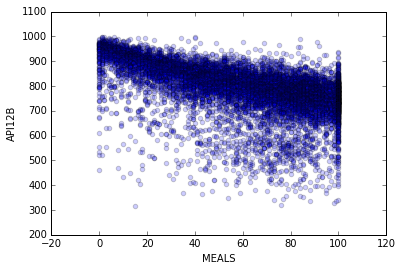

In [8]:
df.plot(kind="scatter", x="MEALS", y="API12B", alpha=0.2)

Conversely, the education level of a student's parents is often a good predictor of how well a student will do in school.

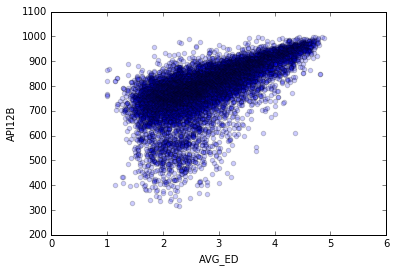

In [9]:
df.plot(kind="scatter", x="AVG_ED", y="API12B", alpha=0.2)

## Running the regression

Like we did last week, we'll use scikit-learn to run basic single-variable regressions. Let's start by looking at California's Academic Performance index as it relates to the percentage of students, per school, enrolled in free/reduced-price lunch programs.

In [10]:
data = np.asarray(df[['API12B','MEALS']])
x, y = data[:, 1:], data[:, 0]

In [11]:
lr = LinearRegression() 
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# plot the linear regression line on the scatter plot
lr.coef_

array([-1.85881873])

In [13]:
lr.score(x, y)

0.27895982917584938

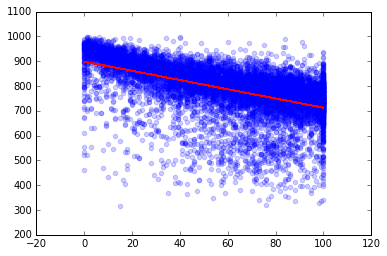

In [15]:
plt.scatter(x, y, color='blue', alpha=0.2)
plt.plot(x, lr.predict(x), color='red', linewidth=1)

In our naive universe where we're only paying attention to two variables -- academic performance and free/reduced lunch -- we can clearly see that some percentage of schools is overperforming the performance that would be expected of them, taking poverty out of the equation.

A handful, in particular, seem to be dramatically overperforming. Let's look at them:

In [21]:
df[(df['MEALS'] >= 80) & (df['API12B'] >= 900)][['SNAME', 'DNAME', 'MEALS', 'API12B']]

,SNAME,DNAME,MEALS,API12B
15,Chin (John Yehall) Elementary,San Francisco Unified,84,989
51,American Indian Public Charter School II,Oakland Unified,91,978
161,KIPP Raices Academy,Los Angeles Unified,92,961
207,Lincoln Elementary,Oakland Unified,83,957
221,Oakland Charter High,Oakland Unified,84,956
445,Richardson Prep Hi,San Bernardino City Unified,100,939
510,Synergy Charter Academy,Los Angeles Unified,100,935
542,Sixth Street Prep,Victor Elementary,83,933
683,KIPP Los Angeles College Preparatory,Los Angeles Unified,95,925
702,Rocketship Mateo Sheedy Elementary,Santa Clara County Office of E,94,924


Let's look specifically at Solano Avenue Elementary, which has an API of 922 and 80 percent of students being in the free/reduced lunch program. If you were to use the above regression to predict how well Solano would do, it would look like this:

In [17]:
lr.predict(80)

array([ 749.6728627])

With an index of 922, clearly the school is overperforming what our simplified model expects.